In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score

# Reading the data

In [3]:
lead=pd.read_csv(r"C:\Users\manis\Downloads\Compressed\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")

In [4]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#info
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
lead.shape

(9240, 37)

In [7]:
lead.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,NaN,NaN,1,2,16
top,8d5d2f30-7ca5-4406-9d2b-3b97114b2cf3,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


## Data cleaning

In [8]:
## checking for the number of unique values in the columns
lead.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [9]:
100*(lead.isnull().sum()/len(lead.index))

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [10]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [11]:
#removing all the columns having null values more then 35%
for i in lead.columns:
    if lead[i].isnull().sum()>3000:
        lead.drop(i,axis=1,inplace=True)

In [12]:
100*(lead.isnull().sum()/len(lead.index))

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [13]:
##the columns country and city will not affect the analysis, so better we drop them
lead.drop(['Country','City','Lead Profile'],axis=1,inplace=True)

In [14]:
##value counts of all the columns
for i in lead:
    print(lead[i].astype('category').value_counts())
    print('=====================================================')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference         

In [15]:
## we can drop all these columns as they have neglible variance present in their values
lead.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque','What matters most to you in choosing a course'
          ,'How did you hear about X Education'], axis = 1, inplace = True)

In [16]:
lead.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [17]:
lead.dropna(axis=0,inplace=True)

In [18]:
lead.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [19]:
##prospect id and lead number are of no use in the analysis so we can drop them
lead.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [20]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


# Univariate Analysis

#### Univariate analysis of categorical variables

In [21]:
lead.columns[lead.dtypes=='object']

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

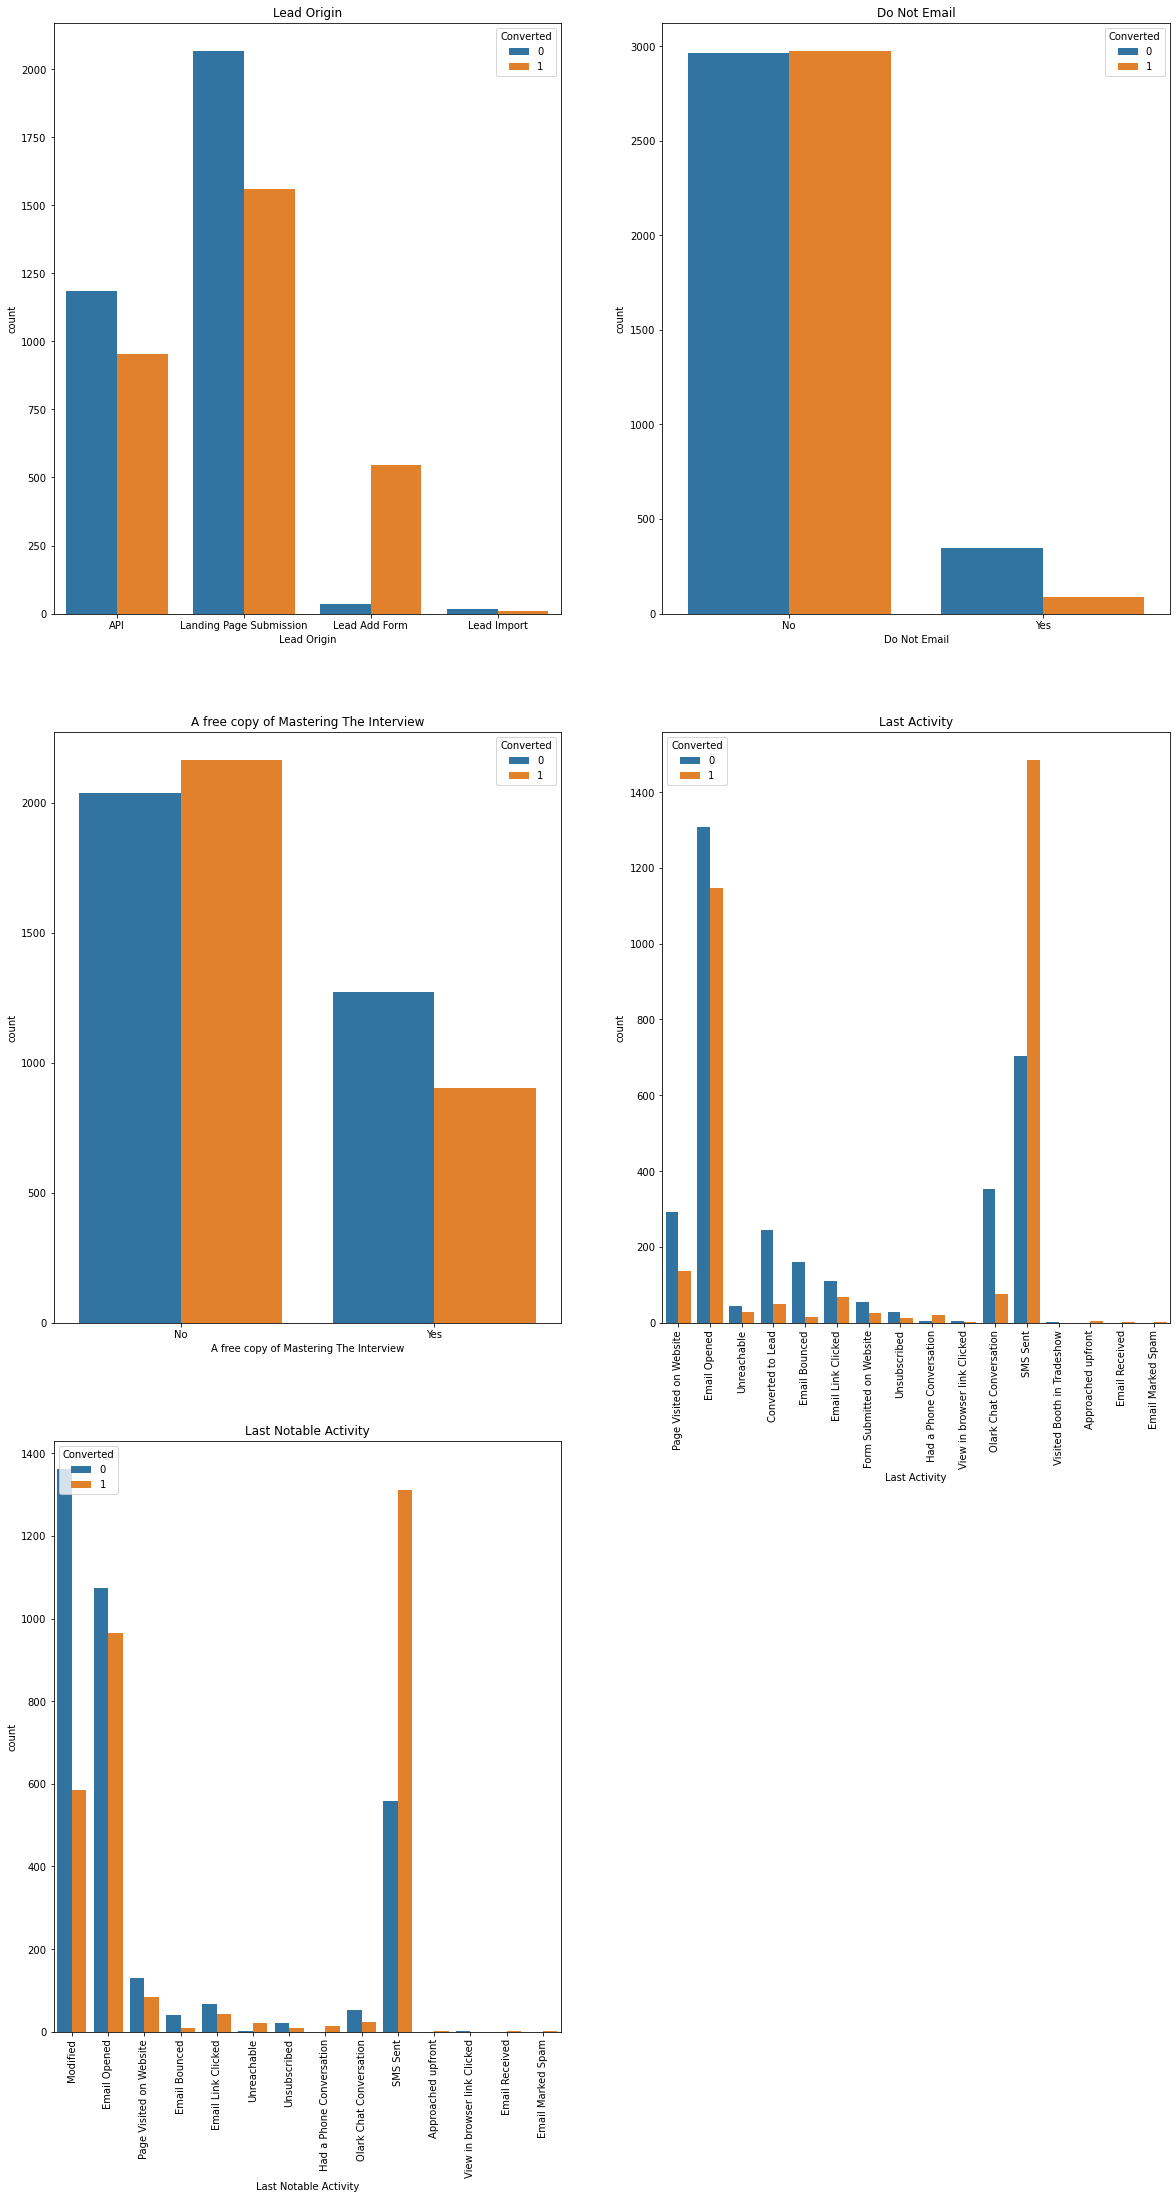

In [22]:
plt.figure(figsize = (20,50))

plt.subplot(4,2,1)
sns.countplot(lead['Lead Origin'],hue=lead['Converted'])
plt.title('Lead Origin')
plt.savefig('Lead Origin.png',bbox_inches='tight')

plt.subplot(4,2,2)
sns.countplot(lead['Do Not Email'],hue=lead['Converted'])
plt.title('Do Not Email')
plt.savefig('Do Not Email.png',bbox_inches='tight')

plt.subplot(4,2,3)
sns.countplot(lead['A free copy of Mastering The Interview'],hue=lead['Converted'])
plt.title('A free copy of Mastering The Interview')
plt.savefig('A free copy of Mastering The Interview.png',bbox_inches='tight')

plt.subplot(4,2,4)
sns.countplot(lead['Last Activity'],hue=lead['Converted']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.savefig('Last Activity.png',bbox_inches='tight')

plt.subplot(4,2,5)
sns.countplot(lead['Last Notable Activity'],hue=lead['Converted']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.savefig('Last Notable Activity.png',bbox_inches='tight')

plt.show()

Text(0.5, 1.0, 'What is your current occupation')

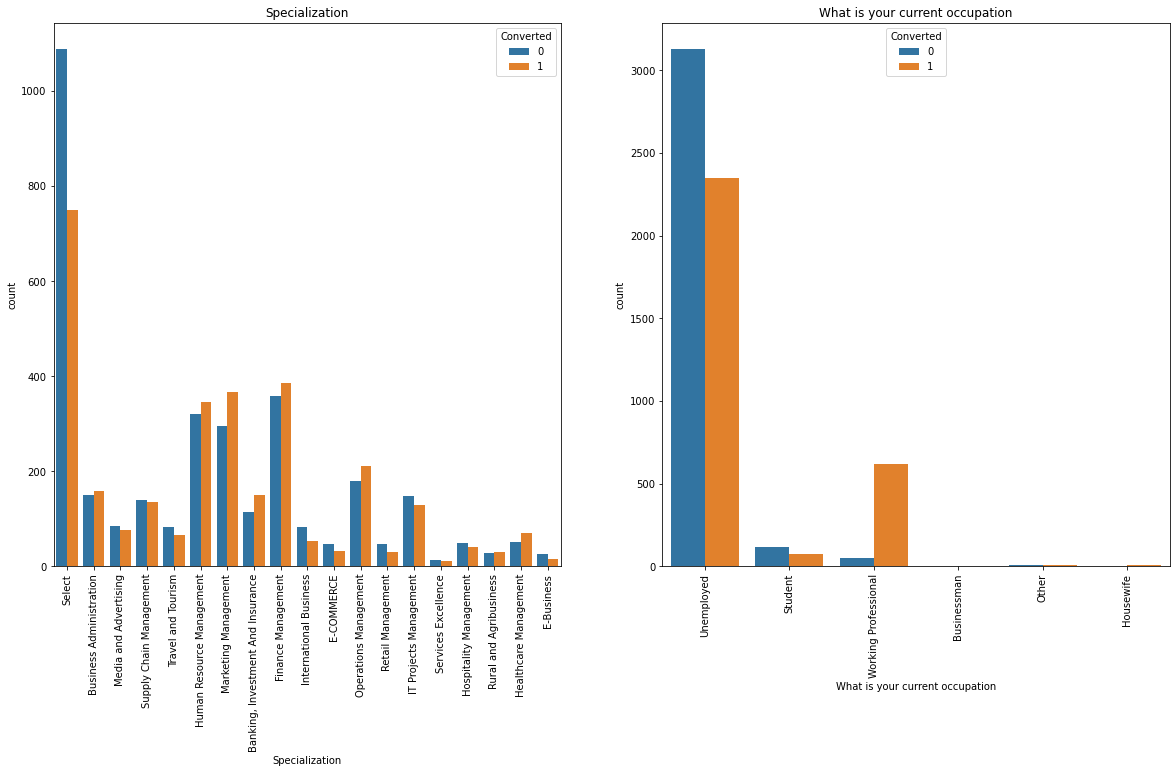

In [23]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(lead['Specialization'],hue=lead['Converted']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(lead['What is your current occupation'],hue=lead['Converted']).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')

#### Bivariate analysis of Numerical variables

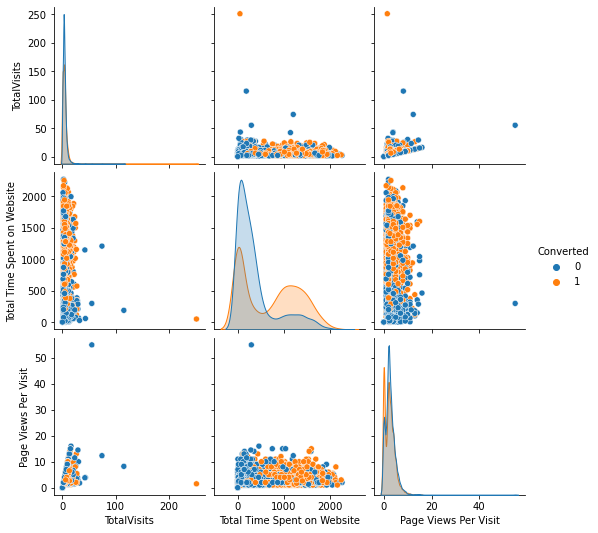

In [24]:
sns.pairplot(lead,hue='Converted')

<AxesSubplot:xlabel='Page Views Per Visit'>

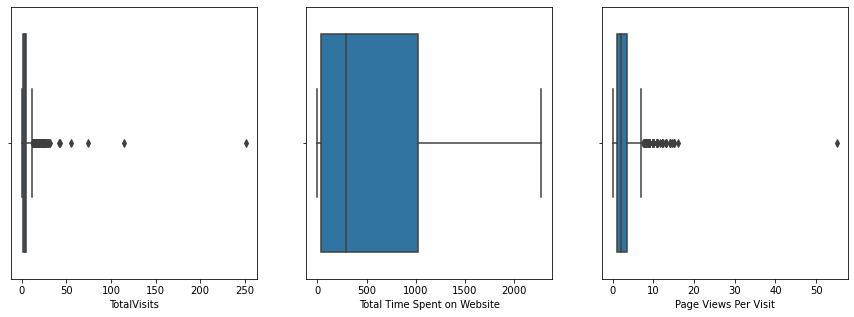

In [25]:
## checking for outliers in numeric variables
fig ,ax=plt.subplots(1,3,figsize=(15,5))
sns.boxplot(lead.TotalVisits,ax=ax[0])
sns.boxplot(lead['Total Time Spent on Website'],ax=ax[1])
sns.boxplot(lead['Page Views Per Visit'],ax=ax[2])

In [26]:
lead.dtypes[lead.dtypes=='object']

Lead Origin                               object
Lead Source                               object
Do Not Email                              object
Last Activity                             object
Specialization                            object
What is your current occupation           object
A free copy of Mastering The Interview    object
Last Notable Activity                     object
dtype: object

In [27]:
## creating dummy variables for categorical columns
dummy_cat=pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
        'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']],drop_first=True)

In [28]:
dummy_cat.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [29]:
## creating dummy variables for the column specialisation as it has select as one of the values
dummy_spec=pd.get_dummies(lead['Specialization'],prefix = 'Specialization')
dummy_spec=dummy_spec.drop(['Specialization_Select'],axis=1,inplace=True)
dummy_cat=pd.concat([dummy_cat,dummy_spec],axis=1)

In [30]:
## merging the dummy variable columns in the original dataframe
lead_final=pd.concat([lead,dummy_cat],axis=1)

In [31]:
##dropping the original columns after dummy creation from the dataframe
lead_final.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
        'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity','Specialization'],axis=1,inplace=True)

In [32]:
lead_final.shape

(6373, 57)

In [33]:
lead_final.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


<AxesSubplot:>

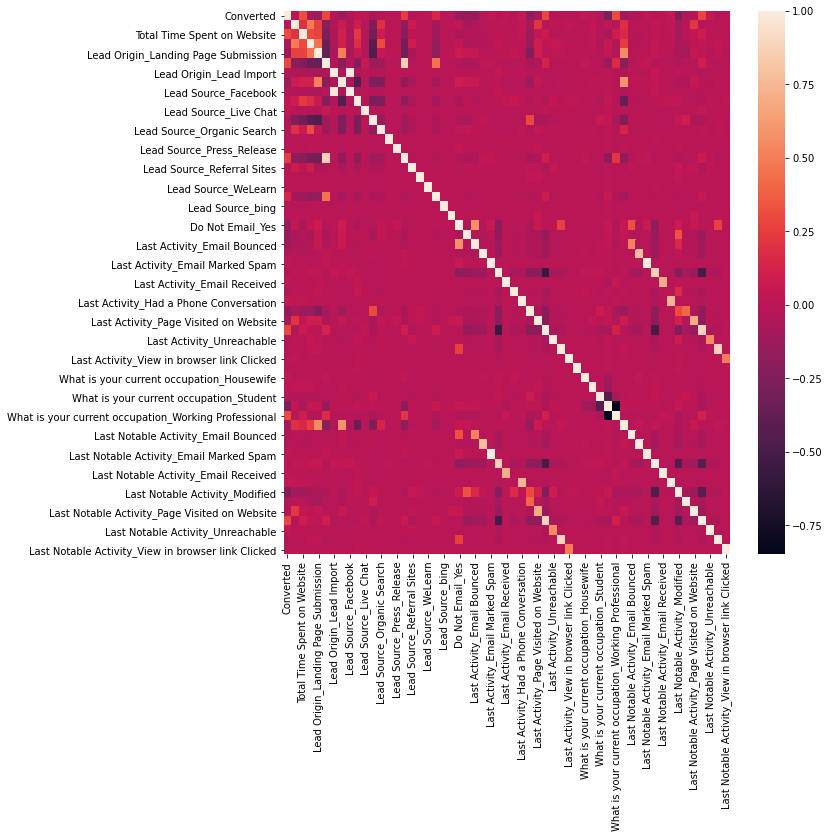

In [140]:
#correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(lead_final.corr())

## Train test split 

In [35]:
#dividing the data set
X=lead_final.drop(['Converted'],1)
y=lead_final['Converted']

In [36]:
print(X.shape)
print(y.shape)

(6373, 56)
(6373,)


In [37]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=100)

In [38]:
##scaling the numeric features
scaler=MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Model building

In [39]:
logreg=LogisticRegression()

In [40]:
##selecting features by rfe method
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [41]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('Lead Origin_Landing Page Submission', False, 27),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 37),
 ('Lead Source_Direct Traffic', False, 7),
 ('Lead Source_Facebook', False, 33),
 ('Lead Source_Google', False, 15),
 ('Lead Source_Live Chat', False, 30),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 14),
 ('Lead Source_Pay per Click Ads', False, 24),
 ('Lead Source_Press_Release', False, 35),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 16),
 ('Lead Source_Social Media', False, 39),
 ('Lead Source_WeLearn', False, 25),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 13),
 ('Lead Source_testone', False, 19),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 9),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link Cli

In [42]:
##storing all the columns selected by rfe 
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [44]:
##modelling using statsmodel
X_train_sm=sm.add_constant(X_train[col])
log1=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res=log1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Wed, 08 Dec 2021   Deviance:                       4145.5
Time:                        19:59:07   Pearson chi2:                 4.84e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0061      0.600     -1.677      0.094      -2.182       0.170
TotalVisits                                             11.3439      2.682      4.230      0.000       6.088      16.600
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                2.9483      1.191      2.475      0.013       0.614       5.283
Lead Source_Olark Chat                                   1.4584      0.122     11.962      0.000       1.219       1.697
Lead Source_Reference                                    1.2994      1.214      1.070      0.285      -1.080       3.679
Lead Source_Welingak Website                             3.4159      1.558      2.192      0.028       0.362       6.470
Do Not Email_Yes                                        -1.5053      0.193     -7.781      0.000      -1.884      -1.126
Last Activity_Had a Phone Conversation                   1.0397      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6492   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1544      0.630     -1.831      0.067      -2.390       0.081
What is your current occupation_Unemployed              -1.3395      0.594     -2.254      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1932   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7868      0.807      3.453      0.001       1.205       4.369
========================================================================================================================
"""

In [45]:
## removing 'What is your current occupation_Housewife' column as it has a high p value
col=col.drop('What is your current occupation_Housewife')

In [46]:
##modelling using statsmodel
X_train_sm=sm.add_constant(X_train[col])
log2=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res=log2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2075.0
Date:                Wed, 08 Dec 2021   Deviance:                       4150.0
Time:                        19:59:07   Pearson chi2:                 4.85e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4526      0.554     -0.817      0.414      -1.538       0.633
TotalVisits                                             11.1481      2.667      4.180      0.000       5.921      16.376
Total Time Spent on Website                              4.4291      0.185     23.922      0.000       4.066       4.792
Lead Origin_Lead Add Form                                2.9438      1.191      2.471      0.013       0.609       5.278
Lead Source_Olark Chat                                   1.4533      0.122     11.933      0.000       1.215       1.692
Lead Source_Reference                                    1.3013      1.214      1.072      0.284      -1.078       3.681
Lead Source_Welingak Website                             3.4163      1.558      2.193      0.028       0.363       6.470
Do Not Email_Yes                                        -1.5079      0.194     -7.785      0.000      -1.888      -1.128
Last Activity_Had a Phone Conversation                   1.0399      0.983      1.058      0.290      -0.886       2.966
Last Activity_SMS Sent                                   1.1824      0.082     14.360      0.000       1.021       1.344
What is your current occupation_Student                 -1.7034      0.589     -2.894      0.004      -2.857      -0.550
What is your current occupation_Unemployed              -1.8883      0.550     -3.435      0.001      -2.966      -0.811
What is your current occupation_Working Professional     0.7253      0.581      1.249      0.212      -0.413       1.864
Last Notable Activity_Had a Phone Conversation          22.1948   1.26e+04      0.002      0.999   -2.47e+04    2.48e+04
Last Notable Activity_Unreachable                        2.7840      0.807      3.448      0.001       1.202       4.366
========================================================================================================================
"""

In [47]:
## removing 'Last Notable Activity_Had a Phone Conversation	' column as it has a high p value
col=col.drop('Last Notable Activity_Had a Phone Conversation')

In [48]:
##modelling using statsmodel
X_train_sm=sm.add_constant(X_train[col])
log3=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res=log3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2077.9
Date:                Wed, 08 Dec 2021   Deviance:                       4155.7
Time:                        19:59:07   Pearson chi2:                 4.85e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4535      0.554     -0.819      0.413      -1.539       0.632
TotalVisits                                             11.2598      2.671      4.215      0.000       6.024      16.495
Total Time Spent on Website                              4.4217      0.185     23.899      0.000       4.059       4.784
Lead Origin_Lead Add Form                                2.9436      1.191      2.471      0.013       0.609       5.278
Lead Source_Olark Chat                                   1.4531      0.122     11.931      0.000       1.214       1.692
Lead Source_Reference                                    1.3014      1.214      1.072      0.284      -1.078       3.681
Lead Source_Welingak Website                             3.4163      1.558      2.193      0.028       0.363       6.470
Do Not Email_Yes                                        -1.5080      0.194     -7.787      0.000      -1.888      -1.128
Last Activity_Had a Phone Conversation                   2.7513      0.802      3.432      0.001       1.180       4.323
Last Activity_SMS Sent                                   1.1823      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Student                 -1.7021      0.588     -2.893      0.004      -2.855      -0.549
What is your current occupation_Unemployed              -1.8871      0.550     -3.433      0.001      -2.964      -0.810
What is your current occupation_Working Professional     0.7244      0.581      1.248      0.212      -0.414       1.862
Last Notable Activity_Unreachable                        2.7830      0.807      3.447      0.001       1.201       4.365
========================================================================================================================
"""

In [49]:
## removing 'Lead Source_Reference' column as it has a high p value
col=col.drop('Lead Source_Reference')

In [50]:
##modelling using statsmodel
X_train_sm=sm.add_constant(X_train[col])
log4=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res=log4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Wed, 08 Dec 2021   Deviance:                       4156.7
Time:                        19:59:07   Pearson chi2:                 4.83e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4528      0.554     -0.818      0.413      -1.538       0.632
TotalVisits                                             11.2586      2.672      4.214      0.000       6.023      16.495
Total Time Spent on Website                              4.4217      0.185     23.898      0.000       4.059       4.784
Lead Origin_Lead Add Form                                4.2057      0.258     16.274      0.000       3.699       4.712
Lead Source_Olark Chat                                   1.4530      0.122     11.930      0.000       1.214       1.692
Lead Source_Welingak Website                             2.1541      1.037      2.078      0.038       0.122       4.186
Do Not Email_Yes                                        -1.5063      0.193     -7.785      0.000      -1.886      -1.127
Last Activity_Had a Phone Conversation                   2.7515      0.802      3.432      0.001       1.180       4.323
Last Activity_SMS Sent                                   1.1823      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Student                 -1.7017      0.588     -2.893      0.004      -2.855      -0.549
What is your current occupation_Unemployed              -1.8879      0.550     -3.435      0.001      -2.965      -0.811
What is your current occupation_Working Professional     0.7246      0.581      1.248      0.212      -0.413       1.862
Last Notable Activity_Unreachable                        2.7834      0.807      3.448      0.001       1.201       4.365
========================================================================================================================
"""

In [51]:
## removing 'What is your current occupation_Working Professional' column as it has a high p value
col=col.drop('What is your current occupation_Working Professional')

In [52]:
##modelling using statsmodel
X_train_sm=sm.add_constant(X_train[col])
log5=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res=log5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Wed, 08 Dec 2021   Deviance:                       4158.1
Time:                        19:59:07   Pearson chi2:                 4.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2040      0.196      1.043      0.297      -0.179       0.587
TotalVisits                                   11.1489      2.665      4.184      0.000       5.926      16.371
Total Time Spent on Website                    4.4223      0.185     23.899      0.000       4.060       4.785
Lead Origin_Lead Add Form                      4.2051      0.258     16.275      0.000       3.699       4.712
Lead Source_Olark Chat                         1.4526      0.122     11.934      0.000       1.214       1.691
Lead Source_Welingak Website                   2.1526      1.037      2.076      0.038       0.121       4.185
Do Not Email_Yes                              -1.5037      0.193     -7.774      0.000      -1.883      -1.125
Last Activity_Had a Phone Conversation         2.7552      0.802      3.438      0.001       1.184       4.326
Last Activity_SMS Sent                         1.1856      0.082     14.421      0.000       1.024       1.347
What is your current occupation_Student       -2.3578      0.281     -8.392      0.000      -2.908      -1.807
What is your current occupation_Unemployed    -2.5445      0.186    -13.699      0.000      -2.908      -2.180
Last Notable Activity_Unreachable              2.7846      0.807      3.449      0.001       1.202       4.367
==============================================================================================================
"""

### All the p values look fine

In [53]:
## calculating the VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.82
1,Total Time Spent on Website,2.00
0,TotalVisits,1.54
7,Last Activity_SMS Sent,1.51
2,Lead Origin_Lead Add Form,1.45
3,Lead Source_Olark Chat,1.33
4,Lead Source_Welingak Website,1.30
5,Do Not Email_Yes,1.08
8,What is your current occupation_Student,1.06
6,Last Activity_Had a Phone Conversation,1.01


### All the vif values are fine so we can proceed to make predictions

In [54]:
#predicting over the final train model
y_train_pred=res.predict(X_train_sm)

In [55]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30011695, 0.14200165, 0.12762885, 0.29155814, 0.95479546,
       0.19442563, 0.17807328, 0.94946006, 0.07599465, 0.98231619])

In [119]:
#creating a dataframe of the final model
y_train_pred_final=pd.DataFrame({'Converted':y_train.values , 'Conversion Prob.': y_train_pred})

In [120]:
y_train_pred_final.head()

,Converted,Conversion Prob.
0,0,0.300117
1,0,0.142002
2,1,0.127629
3,1,0.291558
4,1,0.954795


In [121]:
## prediction is yes or 1 if the conversion probablity is more then 0.5 otherwise it is 0 or no
y_train_pred_final['Prediction']=y_train_pred_final['Conversion Prob.'].apply(lambda x : 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion Prob.,Prediction
0,0,0.300117,0
1,0,0.142002,0
2,1,0.127629,0
3,1,0.291558,0
4,1,0.954795,1


## Model Evaluation

In [122]:
##evaluating model by confusion matrix
matrix=metrics.confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final['Prediction'])
matrix

array([[1929,  383],
       [ 560, 1589]], dtype=int64)

In [123]:
        #predicted   No   yes 
#actual               
#no               3438    457
#yes               747   1709

In [124]:
#accuracy of the model on train data
metrics.accuracy_score(y_train_pred_final['Converted'],y_train_pred_final['Prediction'])

0.7886124187401928

In [125]:
TP=matrix[1,1]
TN=matrix[0,0]
FP=matrix[0,1]
FN=matrix[1,0]

In [126]:
##sensitivity
TP/(TP+FN)

0.739413680781759

In [127]:
##specificity
TN/(TN+FP)

0.8343425605536332

In [128]:
## we took 0.5 as arbitary value for predicting whether the lead will get converted or not, 
#therefore for choosing a actual cutoff we need to plot the roc curve and check the area under the curve 
def roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


In [129]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final['Conversion Prob.'], drop_intermediate = False )

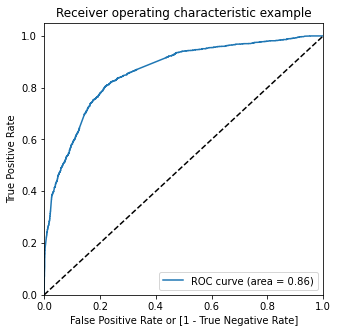

In [130]:
roc(y_train_pred_final.Converted, y_train_pred_final['Conversion Prob.'])


The area under the roc curve is pretty high i.e 0.86 that means we have a satisfactory model

In [131]:
## now we have to find the optimum cutoff value for the predicted value by creating different probablity values
cut_off = [float(x)/10 for x in range(10)]
for i in cut_off:
    y_train_pred_final[i]= y_train_pred_final['Conversion Prob.'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()


,Converted,Conversion Prob.,Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1


In [132]:
## now for choosing a perfect value of cutoff, we have to check the sensitivity, specificity and accuracy of our model at different probablities
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num=[float(x)/10 for x in range(10)]

for i in num:
    matrix1= metrics.confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i])
    matrix1_sum=sum(sum(matrix1))
    TP1=matrix1[1,1]
    TN1=matrix1[0,0]
    FP1=matrix1[0,1]
    FN1=matrix1[1,0]
    
    accur=(TP1+TN1)/matrix1_sum
    speci=TN1/(TN1+FP1)
    sens=TP1/(FN1+TP1)
    cutoff_df.loc[i]=[i,accur,sens,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.527012  0.994416  0.092561
0.2   0.2  0.698274  0.944160  0.469723
0.3   0.3  0.767541  0.865984  0.676038
0.4   0.4  0.791975  0.810610  0.774654
0.5   0.5  0.788612  0.739414  0.834343
0.6   0.6  0.757229  0.624011  0.881055
0.7   0.7  0.735037  0.543509  0.913062
0.8   0.8  0.711500  0.453234  0.951557
0.9   0.9  0.644026  0.279665  0.982699


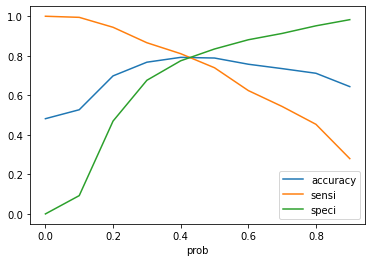

In [133]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [134]:
y_train_pred_final['final_pred']=y_train_pred_final['Conversion Prob.'].apply(lambda x:1 if x>0.42 else 0)
y_train_pred_final.head()

,Converted,Conversion Prob.,Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_pred
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1,1


In [135]:
y_train_pred_final['lead_score']=y_train_pred_final['Conversion Prob.'].apply(lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Conversion Prob.,Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_pred,lead_score
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0,0,30
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0,0,14
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0,0,13
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0,0,29
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1,1,95


In [136]:
checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_pred']]
checking_df['final_pred'].value_counts()

1    1705
0     444
Name: final_pred, dtype: int64

In [137]:
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.final_pred)

0.7908540685944856

In [138]:
##calculating precision and recall for the test set 
# precision
print('precision :',precision_score(y_train_pred_final.Converted, y_train_pred_final.final_pred))

# recall
print('recall :',recall_score(y_train_pred_final.Converted, y_train_pred_final.final_pred))

precision : 0.7771194165907019
recall : 0.793392275476966


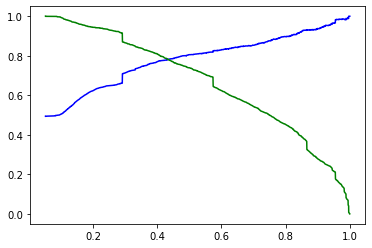

In [76]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final['Conversion Prob.'])
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "g-")

plt.show()

# Prediction on test set

In [77]:
# Scaling the values
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [78]:
#selecting all the columns of X_train and substituting in the X_test
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Unreachable
4771,1.0,0.000000,0.000000,1,0,0,0,0,1,0,0,0
6122,1.0,0.027888,0.029049,0,0,0,0,0,0,0,1,0
9202,1.0,0.015936,0.416813,0,0,0,0,0,1,0,1,0
6570,1.0,0.011952,0.378961,0,0,0,1,0,1,0,1,0
2668,1.0,0.031873,0.395246,0,0,0,0,0,1,0,1,0


In [79]:
## predictions
y_test_pred=res.predict(X_test_sm)

In [80]:
## storing the values of y_pred_test in a df
y_pred_1=pd.DataFrame(y_test_pred)

In [81]:
y_pred_1.head()

,0
4771,0.996296
6122,0.129992
9202,0.703937
6570,0.299564
2668,0.720796


In [82]:
## storing the values of y_test in a df
y_test_df=pd.DataFrame(y_test)

In [83]:
#making leadid as the index
y_test_df['LeadId'] = y_test_df.index

In [84]:
#resetting the indexes of both the created df
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [85]:
#appending both the df
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [86]:
y_pred_final.head()

,Converted,LeadId,0
0,1,4771,0.996296
1,0,6122,0.129992
2,0,9202,0.703937
3,1,6570,0.299564
4,1,2668,0.720796


In [87]:
#renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted Prob.'})

In [88]:
#rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['LeadId','Converted','Converted Prob.'])


In [89]:
y_pred_final.head()

,LeadId,Converted,Converted Prob.
0,4771,1,0.996296
1,6122,0,0.129992
2,9202,0,0.703937
3,6570,1,0.299564
4,2668,1,0.720796


In [103]:
#making the final prediction column based on the optimal cutoff 0.42 
y_pred_final['final_predicted'] = y_pred_final['Converted Prob.'].map(lambda x: 1 if x > 0.42 else 0)

In [104]:
y_pred_final.head()

,LeadId,Converted,Converted Prob.,final_predicted,lead_score
0,4771,1,0.996296,1,100
1,6122,0,0.129992,0,13
2,9202,0,0.703937,1,70
3,6570,1,0.299564,0,30
4,2668,1,0.720796,1,72


In [105]:
#assigning lead score according the lead's probablity of conversion
y_pred_final['lead_score'] = y_pred_final['Converted Prob.'].map(lambda x: round(x*100))

In [106]:
y_pred_final.head()

,LeadId,Converted,Converted Prob.,final_predicted,lead_score
0,4771,1,0.996296,1,100
1,6122,0,0.129992,0,13
2,9202,0,0.703937,1,70
3,6570,1,0.299564,0,30
4,2668,1,0.720796,1,72


In [107]:
#checking the accuracy of the final model on the test set
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7845188284518828

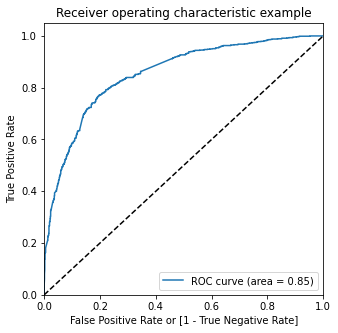

In [116]:
#calling the roc function to find the area under curve
roc(y_pred_final.Converted, y_pred_final['Converted Prob.'])

## The area under the curve is 0.85 which is a good sign

In [117]:
#calculating the confusion matrix to calculate the various performance metrics
matrix2=metrics.confusion_matrix(y_pred_final.Converted,y_pred_final.final_predicted)

In [118]:
matrix2

array([[786, 210],
       [202, 714]], dtype=int64)

In [111]:
TP = matrix2[1,1] 
TN = matrix2[0,0] 
FP = matrix2[0,1] 
FN = matrix2[1,0] 

In [112]:
##sensitivity
TP / (TP+FN)

0.7794759825327511

In [113]:
#specificity
TN / (TN+FP)

0.7891566265060241

In [114]:
##calculating precision and recall for the test set 
# precision
print('precision :',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall :',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision : 0.7727272727272727
recall : 0.7794759825327511


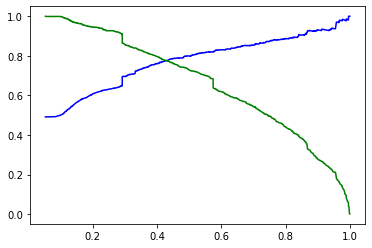

In [115]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final['Converted Prob.'])
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "g-")

plt.show()

# Inferences

1.The columns TotalVisits, Total Time Spent on Website and Lead Origin_Lead Add Form affects the conversion probability in a    positive manner or we can say that:

2.Conversion probability of a lead  will be high if:
  Total number of visits is high
  Total time spent by that lead on the website is high . 
  And if the lead origin is lead add form.
  
3.Conversion probability of a lead  will be low if:
  That lead is unemployed.
  That lead is a student.
  If he has chosen do not email as yes.
